# Computer Vision - P4


## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in *English*.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in *English*.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently.

- The deliverable of both parts must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.


**Deadline (Campus Virtual): November 28th, 23:00 h**

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1 (10 points)** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [80]:
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from skimage.feature import match_template
from skimage.color import  rgba2rgb,rgb2gray

In [81]:
# I realized that we'll need to print same images again so I crete a special function to plot and avoid code repeating
%matplotlib inline
def plot_images(images, titles, figsize=(12,9)):
    fig = plt.figure(figsize=figsize)
    for i in range(len(images)):
        ax = fig.add_subplot(2, 3, i+1)
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

def toGray(img, template=None):
    if img.shape[2] == 4:
        img = rgba2rgb(img)
    if template.shape[2] == 4:
        template = rgba2rgb(template)
    if template is None:
         return rgb2gray(img)
    return rgb2gray(img), rgb2gray(template)


In [113]:
# Your solution here

# Load the images
einstein_image = io.imread('./images/einstein.png')
eye_template = io.imread('./images/eye.png')
# Passing to gray. The resulting images will be normalized
einstein_image,eye_template = toGray(einstein_image,eye_template)

Create a **function** for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:

<img src="images/tm.png" width="800" height="400">

**Use titles in all figures to understand what is being displayed.**

Note: the decision of threshold for SSD distance and normalized cross-correlation will affect your results, try values that get you as close to the shown result as possible but we understand you might not get exactly the same outcome.

In [131]:
# In order to abstract the code, we'll divide in different functions to call anywhere

def ssd_dist(img, template):
    
    w, h = img.shape[0] - template.shape[0], img.shape[1] - template.shape[1]
    ssd_results = np.zeros((w,h))
    # Iterate each value
    for i in range(ssd_results.shape[0]):
        for j in range(ssd_results.shape[1]):            
            # Apply the filter
            filter= img[i:i + template.shape[0], j: j + template.shape[1]] - template
            # Apply np norm to get the value
            ssd_results[i][j] = np.linalg.norm(filter)   
    # Returns the resulting image
    return ssd_results/np.max(ssd_results)

# Getting the ssd or euclidian result
img_eucli = ssd_dist(einstein_image, eye_template)
threshold_ssd = 0.3426 # This value can be changed, I consider this the best one so far since it gives results similar to given samples
# Thresholded image
th_eucli = img_eucli < threshold_ssd

# Getting CC result
cross_Correlation = match_template(einstein_image, eye_template)
threshold_cc = 0.55 # This can be changed. I found best results with this value because it gives results similar to given samples
cross_threshold = cross_Correlation > threshold_cc

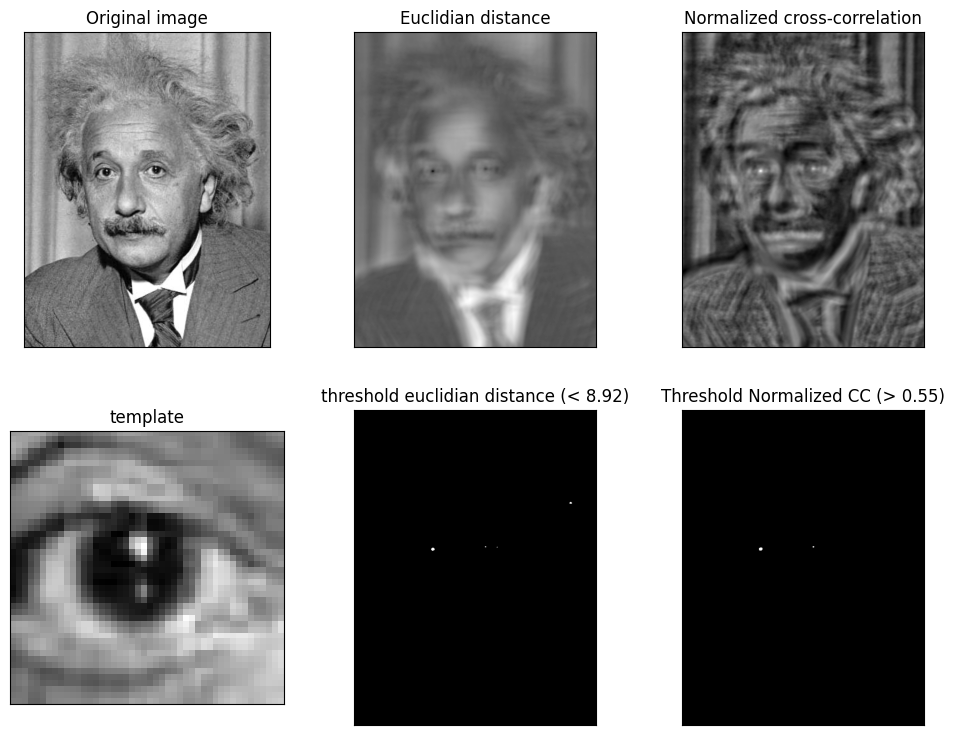

In [132]:
# Plot the results
images_to_plot = [einstein_image,img_eucli,cross_Correlation, eye_template,th_eucli,cross_threshold]
title_for_img = ['Original image', 'Euclidian distance', 'Normalized cross-correlation', 'template', 'threshold euclidian distance (< 8.92)', 'Threshold Normalized CC (> 0.55)']
plot_images(images_to_plot,title_for_img)

**1.2 (5 points)** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)?

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results of the template matching techniques used on 1.1 on this image, using `eye.png` as template:

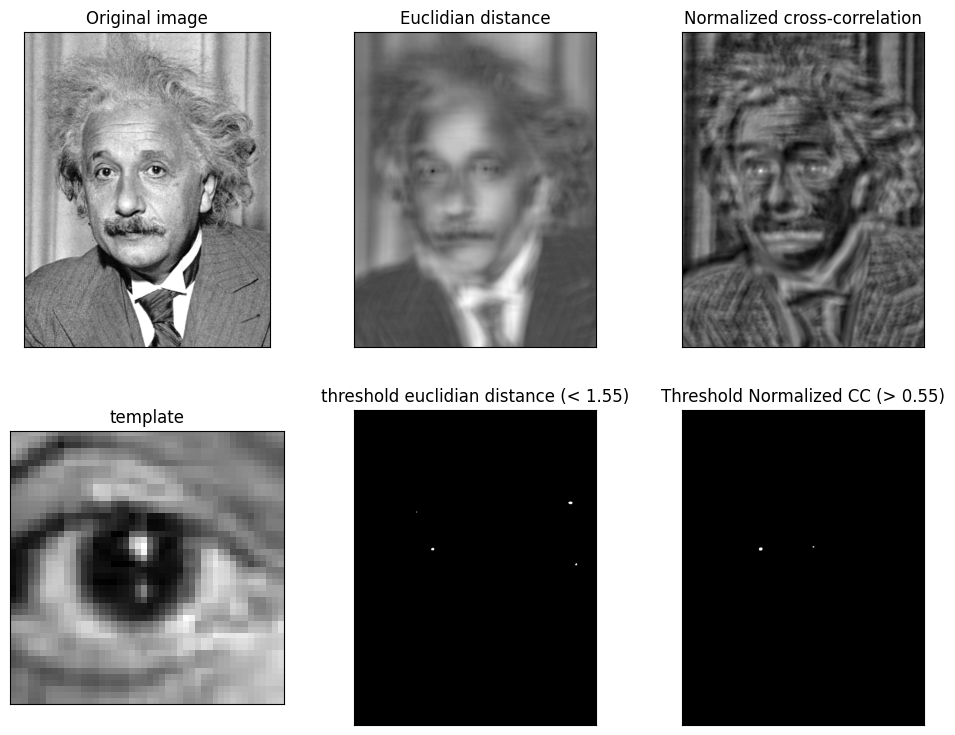

In [133]:
# Your solution here

einstein_br = io.imread('./images/einstein_br.png')
# Normalize the image
einstein_br = einstein_br/np.max(einstein_br)

ssd_br = ssd_dist(einstein_br, eye_template)
thres_eucli_br = ssd_br < 0.35

ncc_br = match_template(einstein_br, eye_template)
thres_ncc_br = ncc_br > 0.55


images_to_plot = [einstein_br,ssd_br,ncc_br, eye_template,thres_eucli_br,thres_ncc_br]
title_for_img = ['Original image', 'Euclidian distance', 'Normalized cross-correlation', 'template', 'threshold euclidian distance (< 1.55)', 'Threshold Normalized CC (> 0.55)']
plot_images(images_to_plot,title_for_img)

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [117]:
# Your solution here
print("Minimum SSD is: " + str(ssd_br.min()))
print("Maximum NCC is: " + str(ncc_br.max()))

Minimum SSD is: 0.12284852029542706
Maximum NCC is: 0.9768232838639569


**1.3 (5 points)** Read `einstein_mask.png` and display the results on this image using your previously coded function, using the `eye.png` template:

0.03639705202943891 1.0


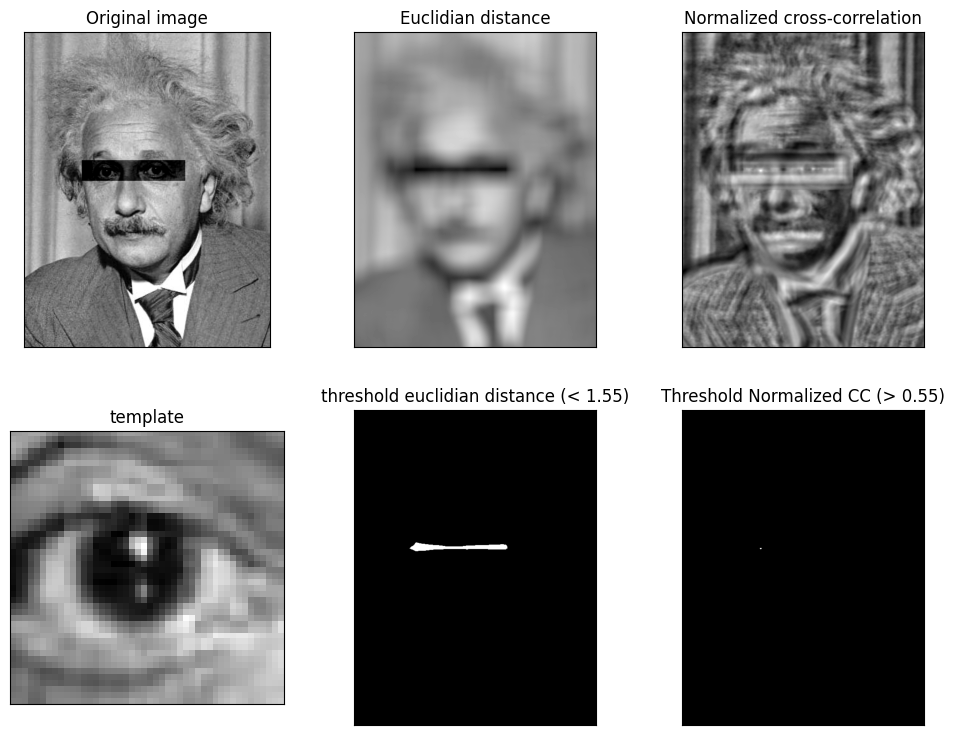

In [144]:
# Your solution here

einstein_mask = io.imread('./images/einstein_mask.png')/255
# Normalize the image
#einstein_mask = einstein_mask/np.max(einstein_mask)
ssd_mask = ssd_dist(einstein_mask, eye_template)
print(ssd_mask.min(), ssd_mask.max())

thres_eucli_mask = ssd_mask <= 0.2

ncc_mask = match_template(einstein_mask, eye_template)
thres_ncc_mask = ncc_mask > 0.55


images_to_plot = [einstein_mask,ssd_mask,ncc_mask, eye_template,thres_eucli_mask,thres_ncc_mask]
title_for_img = ['Original image', 'Euclidian distance', 'Normalized cross-correlation', 'template', 'threshold euclidian distance (< 1.55)', 'Threshold Normalized CC (> 0.55)']
plot_images(images_to_plot,title_for_img)

Print the minimum SSD and the maximum NCC

In [119]:
# Your solution here
print("Minimum SSD is: " + str(ssd_mask.min()))
print("Maximum NCC is: " + str(ncc_mask.max()))

Minimum SSD is: 0.3335426524314804
Maximum NCC is: 0.6166362739337325


What are the distances between the template and the image around the eyes of the image?

In [ ]:
# Your solution here


Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here

**1.4 (5 points)** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

In [ ]:
# Your solution here


Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation. Pick fixed values of thresholds that are well suited for the non rotated image.  

**Help:** use the function rotate() in skimage.transform

In [ ]:
# Your solution here


Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.bmp` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1. (5 points)** Read the template (`person_template.bmp`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

Obtain 2 versions of the HOG descriptor:
- With the default parameters.
- Then with 4x4 pixels per cell and 2x2 cells per block and orientations set to 8

Visualize the original image, the default values HOG descriptor and the defined parameters HOG descriptor in a 1x3 grid of images.

In [ ]:
# Your solution here


Print and explain the number of feature resulting on the default parameters HOG descriptor (4536). Break this number down, starting from the original image size.

In [ ]:
# Your solution here


**2.2. (15 points)** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template.

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images/hog.png" width="400" height="200">

In [ ]:
# Your solution here


Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

In [ ]:
# Your solution here

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem. Note: since you are testing several values and not the whole universe, this question might have different solutions, make sure to try several to at least be directionally correct

In [ ]:
# Your solution here

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems:
- feature location,
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images.

**3.1 (10 points)** First, detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function. (this is a separate funcion from ORB)

In [ ]:
# Your solution here


**3.2 (10 points)** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html).

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [ ]:
# Your solution here


Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better.

In [ ]:
# Your solution here


**3.3 (5 points)** Repeat the experiment:
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100), rotation=0.5)
img_transformed = tf.warp(image2transform, tform)
```

In [ ]:
# Your solution here


**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.


In [ ]:
# Your solution here

**3.4 (5 points)** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo?

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it)

In [ ]:
# Your solution here

# 4. SIFT

**4.1 (5 points)** Now use SIFT to the same problem statement as 3.2 exercise, make sure to show the results with all starbucks images provided. For now, you can use the default parameters of SIFT.
* Compare the results and the running time of both algortihms.
* Which one works best on this case?

In [ ]:
# Your solution


**4.2 (10 points)** Analyze the different SIFT parameters. Try and show the results for at least 3 different combination of parameters for starbucks4.jpg image against starbucks model image.

* What are their effect?
* How do they compare to ORB parameters? 
* Which algorithm is more suitable for images with rotation? And for images that have been rescaled, which one is more effective?
* When it comes to changes in image intensity, which algorithm performs better, ORB or SIFT?

In [ ]:
# Your solution here


**4.3 (10 points)** Can we build an image classifier using the SIFT algorithm? Start by uploading the images from the folder `matches_SIFT`, then use the SIFT algorithm to find the most similar pairs (use the following parameters for this: max_ratio=0.8, upsampling=2, n_octaves=8, n_scales=3). To compare all the images, we'll need to establish a metric. We suggest to use the number of matches between images.

Show your results (SIFT result image matches and print the similarity only for the most similar image for each of the 6 images provided). Rescale the images to see the matches between images.

Answer the following: 
* Is the algorithm failing to find accurate matches (similar images) for some cases? If so, why do you think this is happening? You can assume that a good results is that eiffel tower images match between them and so on. 

Here is an example of the expected results for ciudad_ciencias_1.jpg (you also have to print the similarity metric result): 

<img src="images/example_city_of_arts.png" width="400" height="300">

In [ ]:
# Your solution here


### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)